## Our libraries that we are importing:

In [ ]:
# 1. Importing all the libraries necessary for this assignment
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd

Our task will be to create a function that scrapes weather.com for the location and weather of a zipcode when put into the input argument in the function. We will be using this url:

https://weather.com/weather/today/l/XXXXX:4:US

where XXXXX is the zipcode that is passed in. For example, if passing in 92122, it should scrap this webpage:

https://weather.com/weather/today/l/92122:4:US


When passing in the zipcode as an input argument into our function, it should print the name of the city, the state of the city, the weather in Fahrenheit, and the zipcode.

## Web scraping the data:

First, we're going to web scrap our data from the page at weather.com.

-------------------------------- 2a -------------------------------
<!DOCTYPE doctype html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Today’s and tonight’s Irvine, CA weather forecast, weather conditions and Doppler radar from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daybreak-today/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <
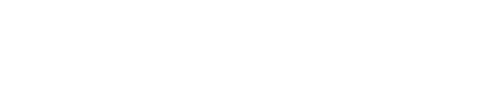
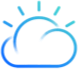

In [ ]:
# 2a. Retrieving the data from the weather.com url
print('-------------------------------- 2a -------------------------------')
# I am using my own zipcode here as an example/test
weather_url = 'https://weather.com/weather/today/l/92606:4:US'
weather = requests.get(weather_url)
soup = BeautifulSoup(weather.content,'html.parser')
print(soup.prettify())

Now we can check the tags we will use for our function.

In [ ]:
# 2b. Using class to find the info we need
print('-------------------------------- 2b -------------------------------')
soup.find_all(class_ = 'card')

-------------------------------- 2b -------------------------------


[<section aria-label="Current Conditions for Irvine, CA Weather" class="card Card--cardPadded--2jAM0 Card--card--4VS_Q CurrentConditions--card--1sxFO gradients--clearNight-contrast--164uQ CurrentConditions--gradient--2g3vw"><div><div class="CurrentConditions--header--3-4zi"><h1 class="CurrentConditions--location--1Ayv3">Irvine, CA Weather</h1><div class="CurrentConditions--timestamp--1SWy5">As of 10:37 pm PDT</div></div><div class="CurrentConditions--dataWrapperInner--2h2vG"><div class="CurrentConditions--primary--3xWnK"><span class="CurrentConditions--tempValue--3KcTQ" data-testid="TemperatureValue">58°</span><div class="CurrentConditions--phraseValue--2xXSr" data-testid="wxPhrase">Clear</div></div><div class="CurrentConditions--secondary--2XNLR"><svg aria-hidden="true" class="CurrentConditions--wxIcon--2cDUg Icon--icon--2AbGu Icon--fullTheme--3jU2v" data-testid="Icon" role="img" set="weather" skycode="31" theme="full" viewbox="0 0 200 200"><title>Clear Night</title><use transform="ma

So let's remind ourselves what we need to look for in our task. We need to be able to get:
*  Name of the city
*  State of the city
*  Weather in Fahrenheit
*  Zipcode


In [ ]:
# 3a. Extracting name of city and state from the webpage
print('-------------------------------- 3a -------------------------------')
# There didn't seem to be a specifcic piece of data listing just city and state, so this is the closest one to what we wanted
soup.find("div", attrs={'class': 'CurrentConditions--header--3-4zi'}).text 


-------------------------------- 3a -------------------------------


'Irvine, CA WeatherAs of 10:37 pm PDT58°ClearClear Night--/52°2% chance of rain through 11 pm'

In [ ]:
# 3b. Extracting current day's weather temperature from the webpage
print('-------------------------------- 3b -------------------------------')
# Here we have our current temperature in the given location in Fahrenheit
soup.find("div", attrs={'class': 'Column--temp--2v_go'}).text

-------------------------------- 3b -------------------------------


'61°'

So here we have both the name of city, state, and the current temperature of the location. Now we just need to identify the zipcode which we'll do in the function below since we need to be able to input it.

In [ ]:
# 4. Defining our function to web scrape weather.com
def weather_data(zipcode):
  location = soup.find("div", attrs={'class': 'CurrentConditions--header--3-4zi'}).text
  current_temp = soup.find("div", attrs={'class': 'Column--temp--2v_go'}).text 
  location1=""

  for i in location.findAll("div", attrs={'class': 'CurrentConditions--header--3-4zi'}):
    location1 = (i.text)
  print("Weather for: ", location1.rscript('Weather'))

  for i in current_temp.findAll("div", attrs={'class': 'Column--temp--2v_go'}):
    print("Temperature now: ", i.text, "F")
  print("Zipcode: ", zipcode)

## Example of our new function:

Let's test our new function by inputting a new zipcode. We will test out 92694 which should give us the temperature for Ladera Ranch in California.

In [ ]:
# Trying out our new function
weather_data(92694)

AttributeError: ignored

Unfortunately, it seems I am wrong in the coding of my function and an error was produced when attempting to input a new zipcode. There is an AttributeError since "findAll" cannot be used since I called the weather_data function passing it a string.

I decided to try a different method in order for my function to work. I am going to use ElementTree XML to create a new function. (I'm a little more familiar with this method due to a project last quarter).

In [ ]:
# 5. Importing additional libraries for the new function
from lxml import etree
from urllib.request import Request, urlopen

In [ ]:
# 6. Defining a different function
def weather(zipcode):
    url = "https://weather.com/weather/today/l/"+zipcode+":4:US"
    response = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(response)
    parser = etree.HTMLParser()
    tree   = etree.parse(webpage, parser)
    temp = tree.xpath('//*[@id="todayDetails"]/section/div[1]/div[1]/span')[0]
    location = tree.xpath('//*[@id="WxuCurrentConditions-main-b3094163-ef75-4558-8d9a-e35e6b9b1034"]/div/section/div/div[1]/h1')[0]
    location1 =""
    for i in location.getiterator():
        location1 = (i.text)
    print("Weather for: ", location1.rstrip('Weather'))
    for i in temp.getiterator():
        print("Temperature now: ", i.text, "F")
    print("Zipcode: ", zipcode)

Okay, let's see if this function will be able to pass a zipcode input.

In [ ]:
# 7a. Testing the new function
print('-------------------------------- 7a -------------------------------')
weather("92694")

-------------------------------- 7a -------------------------------
Weather for:  Ladera Ranch, CA 
Temperature now:  54° F
Zipcode:  92694


In [ ]:
# 7b. Testing another zipcode
print('-------------------------------- 7b -------------------------------')
weather("92093")

-------------------------------- 7b -------------------------------
Weather for:  La Jolla, CA 
Temperature now:  54° F
Zipcode:  92093


Lokks like this function passed the new zipcodes!